# Redes Neuronales - Trabajo Práctico N° 2 - Ejercicio 2
# Notebook #1: Análisis estadístico de los datos

## Integrantes del grupo
* Gaytan, Joaquín Oscar
* Kammann, Lucas Agustín

# Configuración e importación de módulos

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import importlib

In [6]:
import sys

In [7]:
sys.path.insert(0, '../..')

In [8]:
from src import helper
importlib.reload(helper);

In [40]:
sns.set(style='darkgrid', context='notebook')

# Cargando la base de datos

In [41]:
# Read the database from the .csv file into a pandas dataframe
df = pd.read_csv('../../databases/insurance.csv')

# Analizando la base de datos

In [42]:
print(f'Number of entries in the dataset: {df.shape[0]}')

Number of entries in the dataset: 1338


In [43]:
print(f'Columns of the dataset: {df.columns.tolist()}')

Columns of the dataset: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [44]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
# Importing the sklearn module for vectorizing text
from sklearn.feature_extraction.text import CountVectorizer

# Applying the count vectorizer to the region fields
vectorizer = CountVectorizer()
vectorizer.fit(df['region'])

# Printing the vocabulary of the vectorizer
print(f'Valid values for the region feature: {list(vectorizer.vocabulary_.keys())}')

Valid values for the region feature: ['southwest', 'southeast', 'northwest', 'northeast']


# Preprocesamiento de la base de datos
En una primera inspección de la base de datos, se observa que algunas de las variables o características que fueron ensayadas sobre las peronas, se encuentran designadas de forma categórica utilizando una palabra para determinar cuál es la categoría. Este es el caso del **género**, **si es fumador** y la **región** a la que pertenece la persona bajo análisis, entonces se decide para cada una de estas características o variables, realizar un preprocesamiento para traducir las categorías a valores numéricos que puedan ser utilizados por el modelo.

En el caso de las variables **sex** y **smoke** se emplea una codificación directa para determinar si pertenece a una u otra clase en cada característica, por ser categorías binarias, mientras que en el caso de **region** se deberá emplear un one hot encoding, donde se separe cada región en una variable distinta.

In [46]:
from sklearn import preprocessing

In [47]:
# Create a label encoder for the sex variable or feature and create a new column in the dataframe 
# with the encoded version of the gender
sex_encoder = preprocessing.LabelEncoder()
sex_encoder.fit(df['sex'])
df['sex-encoded'] = sex_encoder.transform(df['sex'])

In [48]:
# Create a label encoder for the smoker variable or feature and create a new column in the dataframe
# with the encoded version of the smoker
smoker_encoder = preprocessing.LabelEncoder()
smoker_encoder.fit(df['smoker'])
df['smoker-encoded'] = smoker_encoder.transform(df['smoker'])

In [49]:
# Create a one hot encoder and fit the available types of regions in the dataset
region_encoder = preprocessing.OneHotEncoder()
region_encoder.fit(df['region'].to_numpy().reshape(-1, 1))

# Transform all entries into the one hot encoded representation
encoded_regions = region_encoder.transform(df['region'].to_numpy().reshape(-1, 1)).toarray()

# Add each new encoded variable or feature to the dataset
for i, category in enumerate(region_encoder.categories_[0]):
    df[f'{category}-encoded'] = encoded_regions.transpose()[i]

In [50]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex-encoded,smoker-encoded,northeast-encoded,northwest-encoded,southeast-encoded,southwest-encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0.0,1.0,0.0,0.0


In [51]:
df_x = df[['age', 'bmi', 'smoker-encoded', 'children', 'sex-encoded', 'northwest-encoded', 'northeast-encoded', 'southwest-encoded', 'southeast-encoded']]
df_y = df['charges']

In [20]:
df.describe()

,age,bmi,children,charges,sex-encoded,smoker-encoded,northeast-encoded,northwest-encoded,southeast-encoded,southwest-encoded
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1338 non-null   int64  
 1   sex                1338 non-null   object 
 2   bmi                1338 non-null   float64
 3   children           1338 non-null   int64  
 4   smoker             1338 non-null   object 
 5   region             1338 non-null   object 
 6   charges            1338 non-null   float64
 7   sex-encoded        1338 non-null   int32  
 8   smoker-encoded     1338 non-null   int32  
 9   northeast-encoded  1338 non-null   float64
 10  northwest-encoded  1338 non-null   float64
 11  southeast-encoded  1338 non-null   float64
 12  southwest-encoded  1338 non-null   float64
dtypes: float64(6), int32(2), int64(2), object(3)
memory usage: 125.6+ KB


In [49]:
df.isnull().sum()

age                  0
sex                  0
bmi                  0
children             0
smoker               0
region               0
charges              0
sex-encoded          0
smoker-encoded       0
northeast-encoded    0
northwest-encoded    0
southeast-encoded    0
southwest-encoded    0
dtype: int64

# Análisis estadístico de la base de datos

## Distribución y comportamiento de las variables
En esta subsección del análisis estadístico de la base de datos, nos sentramos en observar cómo es la distribución de cada una de las variables y obtener información estadística que nos permita determinar, por ejemplo, la existencia de outliers o valores poco representativos. Es importante aclarar, que el análisis del grado de dependencia entre las variables será realizado posteriormente.

### Observaciones y comentarios

* La distribución de la región a la que pertence la persona es aproximadamente balanceada
* La distribución del sexo de la persona es aproximadamente balanceada
* La distribución de si la persona es o no fumadora, es una distribución desbalanceada, hay mucha más cantidad de no fumadores que fumadores. En principio esto se podría pensar como un reflejo de la realidad, ya que podría suceder que es más común que la gente no fume, pero eso no nos impediría buscar datos en igual proporción de ambas categorías.
* La edad parecería ser una variable categórica balanceada, no obstante hay mucha mayor cantidad de personas de 18-19 años que en las otras edades, aunque ignorando este aspecto hay igual proporción para las demás edades. Esto, al igual que antes, podría tener algún impacto ya que en nuestros datos de análisis dominan ciertos grupos etarios al momento de tomar información para el aprendizaje.
* El índice de masa corporal o BMI, posee una distribución que a simple vista puede asumirse normal o gaussiana.
* El índice de masa corporal o BMI, posee algunos valores outliers.

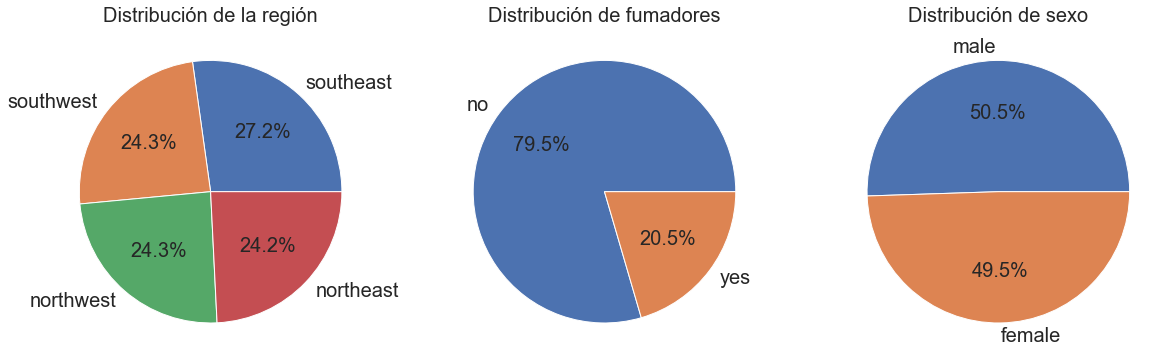

In [50]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

# Plotting the distribution of the Region feature or variable
plot = df['region'].value_counts().plot(
    kind='pie', 
    autopct="%.1f%%", 
    fontsize=20, 
    figsize=(15, 15),
    use_index=False,
    ax=axes[0]
)
axes[0].set_title('Distribución de la región', fontsize=20)
axes[0].set_ylabel('')

# Plotting the distribution of the Smoker feature or variable
plot = df['smoker'].value_counts().plot(
    kind='pie', 
    autopct="%.1f%%", 
    fontsize=20, 
    figsize=(15, 15),
    use_index=False,
    ax=axes[1]
)
axes[1].set_title('Distribución de fumadores', fontsize=20)
axes[1].set_ylabel('')

# Plotting the distribution of the Sex feature or variable
plot = df['sex'].value_counts().plot(
    kind='pie', 
    autopct="%.1f%%", 
    fontsize=20, 
    figsize=(20, 20),
    use_index=False,
    ax=axes[2]
)
axes[2].set_title('Distribución de sexo', fontsize=20)
axes[2].set_ylabel('')

# Show graph
plt.show()

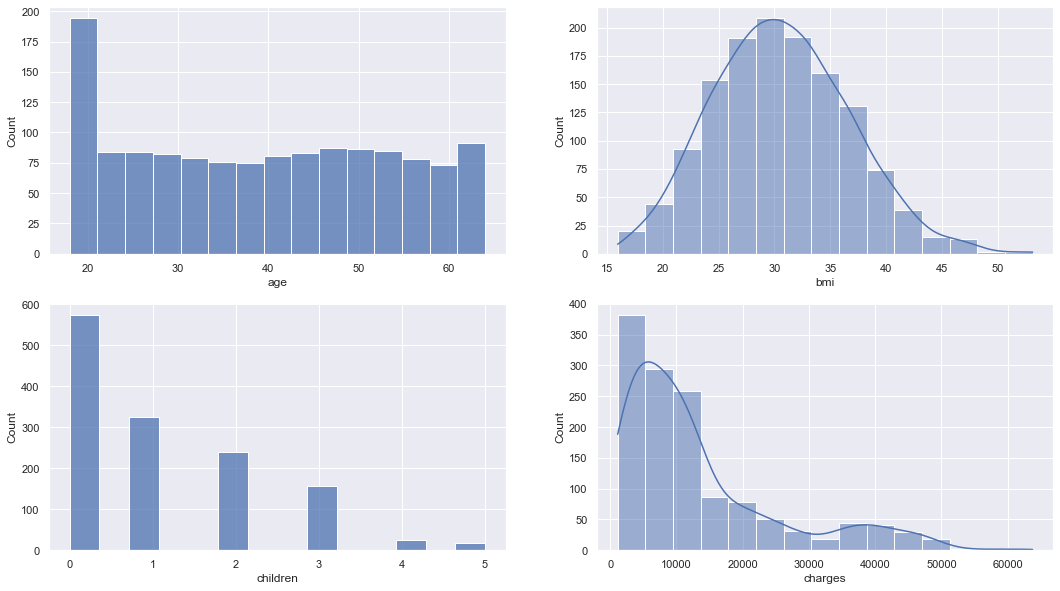

In [51]:
# Create subplots to arrange the layout
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

# Plotting the age variable
_ = sns.histplot(data=df['age'], bins=15, ax=ax[0][0])

# Plotting the bmi variable
_ = sns.histplot(data=df['bmi'], bins=15, ax=ax[0][1], kde=True)

# Plotting the children variable
_ = sns.histplot(data=df['children'], ax=ax[1][0])

# Plotting the charges variable
_ = sns.histplot(data=df['charges'], bins=15, ax=ax[1][1], kde=True)

# Show graph
plt.show()

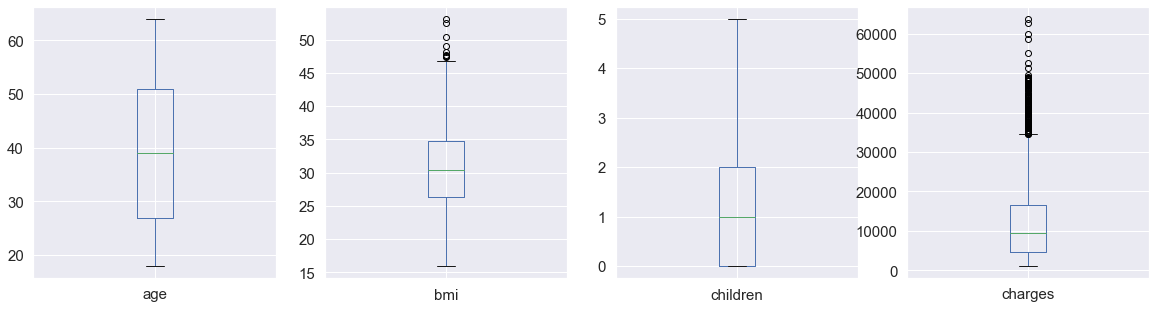

In [52]:
_ = df[['age', 'bmi', 'children', 'charges']].plot(kind='box', subplots=True, layout=(1, 4), sharex=False, sharey=False, figsize=(20, 5), fontsize=15)

In [53]:
bmi_outliers = helper.get_outliers(df, 'bmi')
print(f'BMI Outliers N={len(bmi_outliers)}: {bmi_outliers}')

BMI Outliers N=9: [49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]


In [54]:
helper.remove_outliers(df, 'bmi')

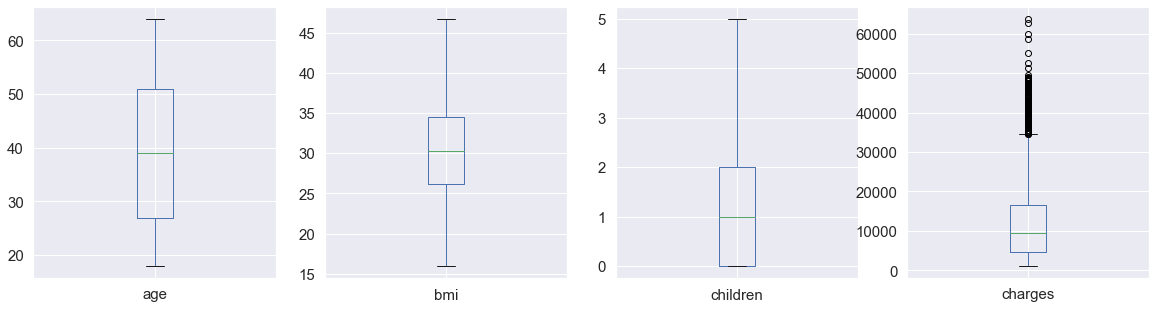

In [55]:
_ = df[['age', 'bmi', 'children', 'charges']].plot(kind='box', subplots=True, layout=(1, 4), sharex=False, sharey=False, figsize=(20, 5), fontsize=15)

In [56]:
df.describe()

,age,bmi,children,charges,sex-encoded,smoker-encoded,northeast-encoded,northwest-encoded,southeast-encoded,southwest-encoded
count,1338.000000,1329.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.537348,1.094918,13270.422265,0.505232,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,5.919946,1.205493,12110.011237,0.500160,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.220000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.300000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.485000,2.000000,16639.912515,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,46.750000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Estudio de la dependencia, vínculo o relación entre variables
Se calculan las correlaciones entre las variables aleatorias consideradas bajo el análisis del problema de clasificación, incluyendo además la variable de salida a predecir o salida deseada. Particularmente, se remarcan los siguientes puntos como observaciones o comentarios a partir de lo observado en el gráfico.
* El costo de los servicios médicos guarda una relación más fuerte (a comparación del resto), con respecto a la edad, si es fumador y el índice de masa muscular.
* El resto de las variables poseen una correlación muy cercana a ser nula, con lo cual la información sobre el costo del servicio médico que aporta conocer tales variables, es despreciable. Esto sugiere que esas variables podrían ser removidas sin tener un impacto sobre la performance del modelo que sea notorio. Aunque por otro lado, podría ser que la relación que guardan no es estrictamente lineal.
* Las cuatro variables utilizadas a partir del preprocesamiento One Hot Encoding agregan redudancia, una de ellas podría ser eliminada.

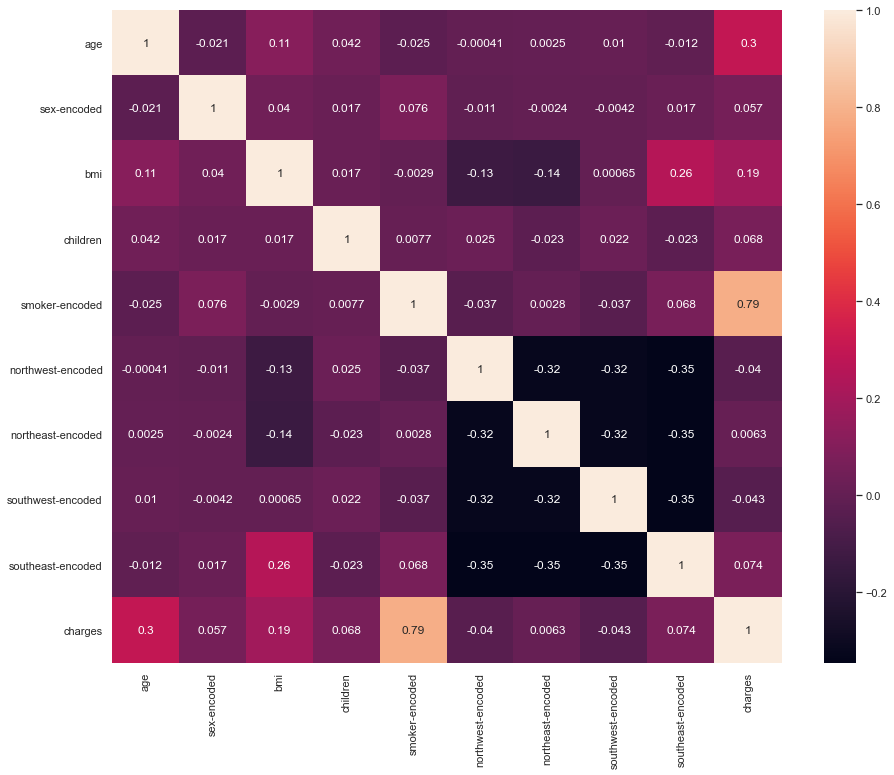

In [57]:
# Compute the correlation between variables, features and the include the outcome variables (charges)
correlation = df[['age', 'sex-encoded', 'bmi', 'children', 'smoker-encoded', 'northwest-encoded', 'northeast-encoded', 'southwest-encoded', 'southeast-encoded', 'charges']].corr()

# Plot the correlation as a heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
_ = sns.heatmap(correlation, annot=True, ax=ax)
plt.show()

## Soluciones triviales
Nos proponemos plantear como solución trivial del problema, informar la media de la variable aleatoria **charges**, y nos preguntamos para ese caso cuál sería el valor medio del error, o **MAE**. El objetivo es tener una cifra de referencia para ver qué tan buenos son los resultados obtenidos posteriormente.

In [58]:
trivial_mae = ((df['charges'] - df['charges'].mean()).abs()).mean()

In [59]:
print(f'Trivial MAE {round(trivial_mae, 2)}')

Trivial MAE 9091.13


### ¿Qué pasa si removía los outliers de la salida?

In [60]:
helper.remove_outliers(df, 'charges')

In [61]:
trivial_mae = ((df['charges'] - df['charges'].mean()).abs()).mean()

In [62]:
print(f'Trivial MAE {round(trivial_mae, 2)}')

Trivial MAE 5606.57
